In [38]:
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
# Load the data using pandas
df = pd.read_csv('Earthquake.csv')

# Show the first 5 rows
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-05-10T16:14:23.440Z,37.942501,-122.166168,16.549999,1.26,md,8.0,142.0,0.15000,0.28,...,2025-05-10T16:32:18.246Z,"7 km NNE of Orinda, CA",earthquake,2.45,0.96,0.030000,3.0,automatic,nc,nc
1,2025-05-10T15:47:16.590Z,38.815334,-122.818832,3.570000,0.62,md,7.0,98.0,0.01035,0.02,...,2025-05-10T16:22:20.179Z,"7 km NW of The Geysers, CA",earthquake,0.82,1.90,0.250000,9.0,automatic,nc,nc
2,2025-05-10T15:46:31.650Z,33.561000,-116.792833,6.200000,0.74,ml,25.0,56.0,0.04658,0.12,...,2025-05-10T15:50:19.763Z,"11 km W of Anza, CA",earthquake,0.16,0.32,0.186000,19.0,automatic,ci,ci
3,2025-05-10T15:21:14.570Z,18.039500,-66.791667,16.350000,2.55,md,18.0,83.0,0.01940,0.13,...,2025-05-10T15:39:38.050Z,"2 km N of Guayanilla, Puerto Rico",earthquake,0.31,0.47,0.088013,9.0,reviewed,pr,pr
4,2025-05-10T15:20:50.050Z,35.765333,-117.587167,3.940000,1.11,ml,28.0,60.0,0.13100,0.13,...,2025-05-10T15:24:18.595Z,"16 km W of Searles Valley, CA",earthquake,0.15,0.48,0.187000,21.0,automatic,ci,ci


In [40]:
# Check the shape of the dataset (rows and columns)
print("Rows and Columns:", df.shape)

# List out all the column names
print("\nColumns:\n", df.columns.tolist())

# See a random sample of 5 rows
df.sample(5)

Rows and Columns: (9685, 22)

Columns:
 ['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource']


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
6098,2025-04-20T05:29:23.660Z,38.770500,-122.738998,0.26,0.76,md,6.0,86.00,0.01284,0.0200,...,2025-04-20T05:30:58.867Z,"2 km SE of The Geysers, CA",earthquake,0.42,1.29,0.21000,7.0,automatic,nc,nc
4179,2025-04-26T03:20:59.740Z,38.785000,-122.766830,2.01,2.35,md,68.0,41.00,0.01428,0.0700,...,2025-05-04T23:42:52.420Z,"1 km NW of The Geysers, CA",earthquake,0.13,0.24,0.14000,70.0,automatic,nc,nc
6407,2025-04-19T08:05:44.580Z,42.107333,-120.184833,2.72,1.59,md,5.0,244.00,0.17430,0.0800,...,2025-04-20T05:34:31.080Z,"15 km NE of New Pine Creek, Oregon",earthquake,1.27,2.37,0.07517,4.0,reviewed,uw,uw
8559,2025-04-13T21:19:49.624Z,36.751400,-116.163700,4.50,-0.20,ml,18.0,52.88,0.02600,0.0897,...,2025-04-15T00:21:36.804Z,"48 km WNW of Indian Springs, Nevada",earthquake,NaN,1.10,0.19000,5.0,reviewed,nn,nn
7250,2025-04-16T20:37:22.450Z,38.316167,-122.802500,-0.05,1.33,md,25.0,40.00,0.03708,0.1700,...,2025-04-21T09:17:19.672Z,"8 km W of Cotati, CA",earthquake,0.27,0.66,0.15900,18.0,reviewed,nc,nc


In [41]:
# Keep only important columns
df_clean = df[['time', 'place', 'mag', 'depth', 'latitude', 'longitude']]

# Drop rows where magnitude (mag) is missing
df_clean = df_clean.dropna(subset=['mag'])

# Show cleaned data sample
df_clean.sample(5)

,time,place,mag,depth,latitude,longitude
4100,2025-04-26T10:38:56.358Z,"55 km WNW of Beatty, Nevada",1.40,8.4000,37.127500,-117.318100
729,2025-05-07T18:03:58.390Z,"64 km WNW of Tyonek, Alaska",-0.46,2.9600,61.278667,-152.247000
4970,2025-04-23T11:14:24.340Z,"7 km WNW of Cobb, CA",0.72,1.6600,38.836498,-122.797165
8143,2025-04-14T18:43:47.590Z,"4 km SSW of Anderson Springs, CA",0.80,1.0900,38.743000,-122.703499
4746,2025-04-24T04:00:14.878Z,"33 km SE of Malaga, New Mexico",1.80,7.0227,32.005000,-103.821000


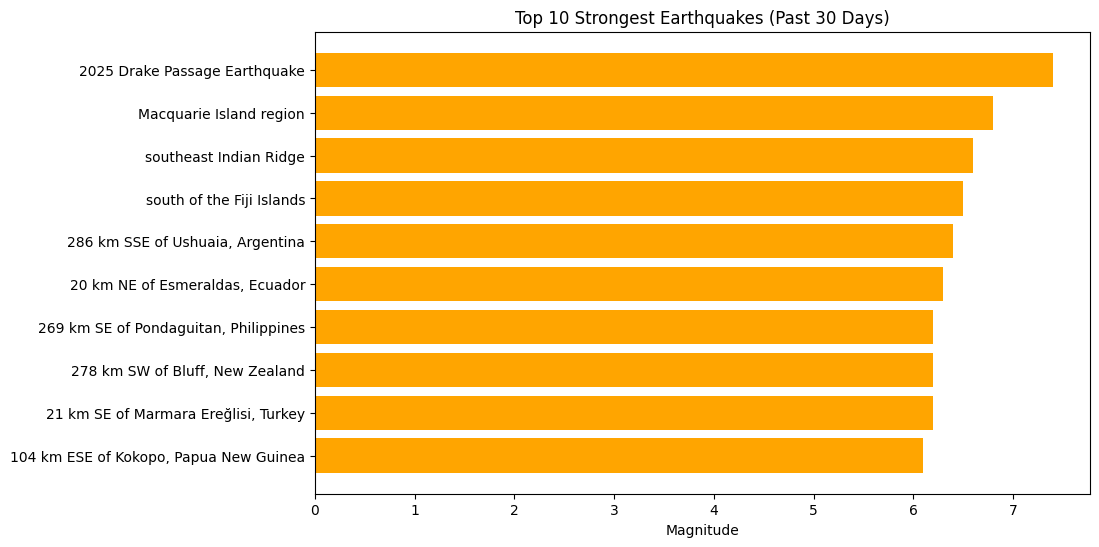

In [42]:
# Get top 10 strongest earthquakes
top10 = df_clean.sort_values(by='mag', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top10['place'], top10['mag'], color='orange')
plt.xlabel('Magnitude')
plt.title('Top 10 Strongest Earthquakes (Past 30 Days)')
plt.gca().invert_yaxis() # Highest on top
plt.show()

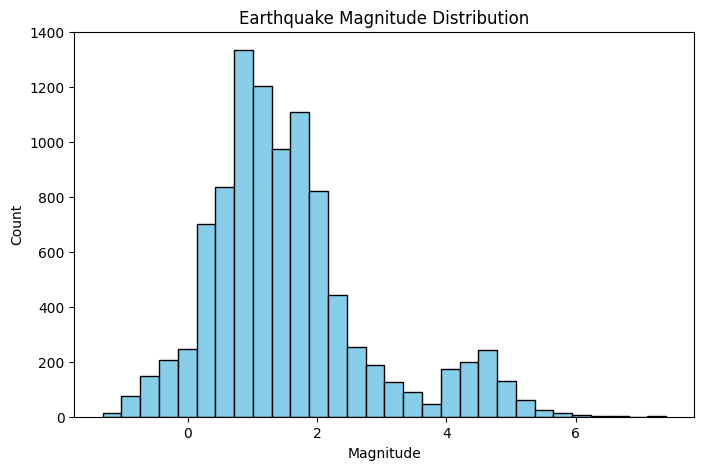

In [43]:
plt.figure(figsize=(8,5))
plt.hist(df_clean['mag'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.title('Earthquake Magnitude Distribution')
plt.show()

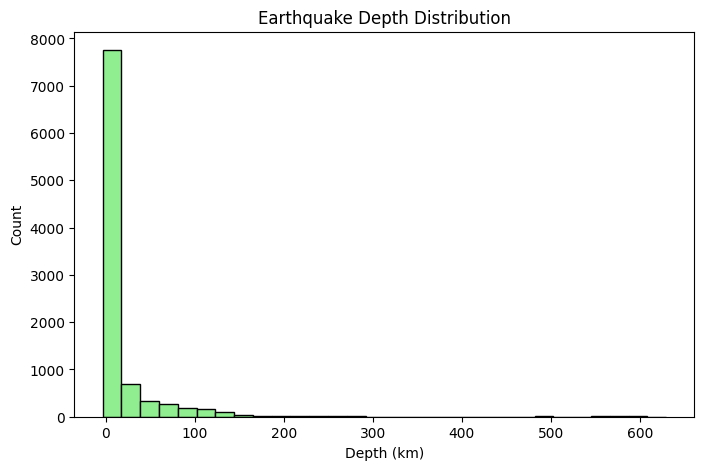

In [44]:
plt.figure(figsize=(8,5))
plt.hist(df_clean['depth'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Depth (km)')
plt.ylabel('Count')
plt.title('Earthquake Depth Distribution')
plt.show()

In [45]:
# Save cleaned data to a new CSV file
df_clean.to_csv('cleaned_earthquake_data.csv', index=False)

Conclusion :

- Analyzed earthquake data from the past 30 days.
- Found top 10 strongest earthquakes with magnitude up to 7.0.
- Most earthquakes are of magnitude between 4 and 5.
- Depth distribution shows most quakes occur at shallow depths (< 50 km).

 Cleaned and saved the filtered data as CSV.
 Visualized key insights with charts.